<a href="https://colab.research.google.com/github/SeungPang11/Diabetes-Progression-Prediction/blob/main/Diabetes_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diabetes Progression Prediction and Data Analysis**

In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [179]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [180]:
# Load diabetes data
diab_df = pd.read_csv("/content/drive/MyDrive/diabetes.csv")


In [181]:
diab_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [182]:
# Biologically, it's impossible to have Glucose, BloodPressure, Insulin, BMI level of 0 
# Drop those columns or replace with mean
diab_df[diab_df ==0].count()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [183]:
# Get average of Glucose, BloodPressure, Insulin, BMI level
Glucose_Avg = diab_df['Glucose'].mean()

In [184]:
BP_Avg = diab_df['BloodPressure'].mean()

In [185]:
Insulin_Avg = diab_df['Insulin'].mean()

In [186]:
BMI_Avg = diab_df['BMI'].mean()

In [187]:
# Replace rows with 0 Glucose, BloodPressure, Insulin, BMI level
# With the average 

In [188]:
# Glucose
diab_df['Glucose'] = diab_df['Glucose'].replace(0, Glucose_Avg)

In [189]:
diab_df['Glucose'].min()

44.0

In [190]:
# BloodPressure
diab_df['BloodPressure'] = diab_df['BloodPressure'].replace(0, BP_Avg)

In [191]:
diab_df['BloodPressure'].min()

24.0

In [192]:
# Insulin
diab_df['Insulin'] = diab_df['Insulin'].replace(0, Insulin_Avg)

In [193]:
diab_df['Insulin'].min()

14.0

In [194]:
# BMI
diab_df['BMI'] = diab_df['BMI'].replace(0, BMI_Avg)

In [195]:
diab_df['BMI'].min()

18.2

In [196]:
# Prepared Data
diab_df[diab_df ==0].count()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [197]:
diab_df.shape

(768, 9)

In [198]:
# Check for missing values
diab_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [199]:
diab_df.describe

<bound method NDFrame.describe of      Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0             35   79.799479  33.6   
1              1     85.0           66.0             29   79.799479  26.6   
2              8    183.0           64.0              0   79.799479  23.3   
3              1     89.0           66.0             23   94.000000  28.1   
4              0    137.0           40.0             35  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0             48  180.000000  32.9   
764            2    122.0           70.0             27   79.799479  36.8   
765            5    121.0           72.0             23  112.000000  26.2   
766            1    126.0           60.0              0   79.799479  30.1   
767            1     93.0           70.0             31   79.799479  30.4   

     DiabetesPedigreeFunction  Age  Outco

In [200]:
# Diabetic vs. Non-Diabetic
outcome = ["1-Diabetic", "0-Non-Diabetic"]
ones = diab_df['Outcome'].value_counts()[1] #268
zeros = diab_df['Outcome'].value_counts()[0] #500
size = []
size.append(ones)
size.append(zeros)


In [201]:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)

Text(0.5, 1.0, 'Diabetic vs. Non-Diabetic Patients')

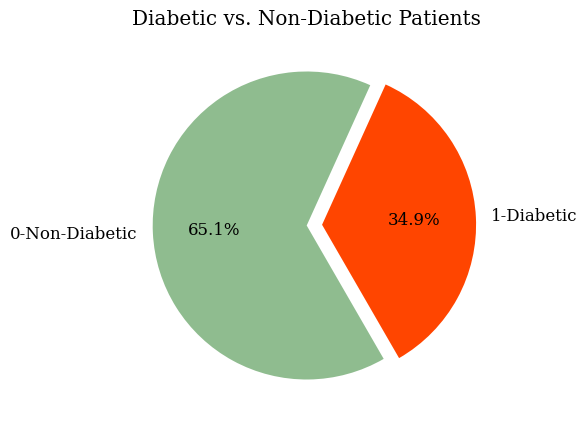

In [202]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.pie(size, labels=outcome, autopct='%1.1f%%', colors=['orangered', 'darkseagreen'], startangle=-60, explode=(0.1, 0))
ax.set_title("Diabetic vs. Non-Diabetic Patients")

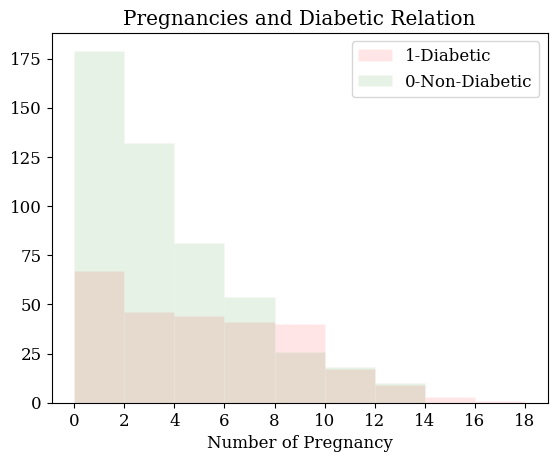

In [203]:
# Pregnancies and Diabetic Relation

#diab_df['Pregnancies'].unique()
#[ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14] unique numbers of pregnancies

diabetic = diab_df.loc[diab_df['Outcome'] == 1]
non_diabetic = diab_df.loc[diab_df['Outcome'] == 0]

# plt.figure(figsize=(6,4)) 
plt.hist(diabetic['Pregnancies'], bins=[0, 2, 4, 6, 8, 10, 12, 14, 16, 18], alpha=0.10, edgecolor="white", color='red')
plt.hist(non_diabetic['Pregnancies'], bins=[0, 2, 4, 6, 8, 10, 12, 14, 16, 18], alpha=0.10, edgecolor="white", color='green')

plt.xticks(np.arange(0, 19, 2))
plt.title("Pregnancies and Diabetic Relation")
plt.xlabel("Number of Pregnancy")
  
plt.legend(['1-Diabetic', '0-Non-Diabetic'])
  
plt.show()

In [204]:
# BloodPressure               
# SkinThickness               
# Insulin                     
# BMI                         
# DiabetesPedigreeFunction    
# Age    

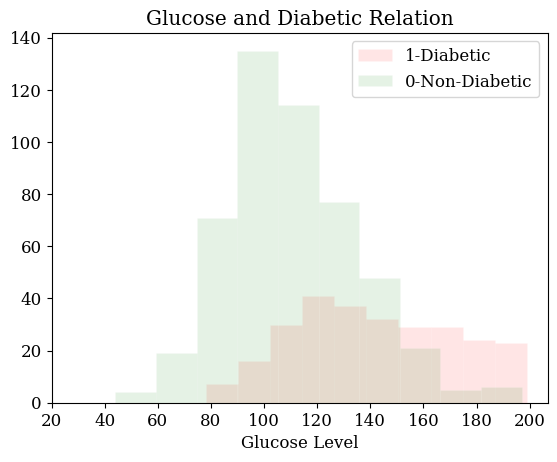

In [205]:
# Glucose and Diabetic Relation min 0 - max 199

# diabetic = diab_df.loc[diab_df['Outcome'] == 1]
# non_diabetic = diab_df.loc[diab_df['Outcome'] == 0]

# plt.figure(figsize=(6,4)) 
plt.hist(diabetic['Glucose'], bins=10, alpha=0.10, edgecolor="white", color='red')
plt.hist(non_diabetic['Glucose'], bins=10, alpha=0.10, edgecolor="white", color='green')

plt.xticks(np.arange(20, 201, 20))
plt.title("Glucose and Diabetic Relation")
plt.xlabel("Glucose Level")
  
plt.legend(['1-Diabetic', '0-Non-Diabetic'])
plt.show()

In [206]:
# Avg diabetic Glucose level
diabetic['Glucose'].mean()

142.15966068097015

In [207]:
# Avg non-diabetic Glucose level
non_diabetic['Glucose'].mean()

110.7053671875

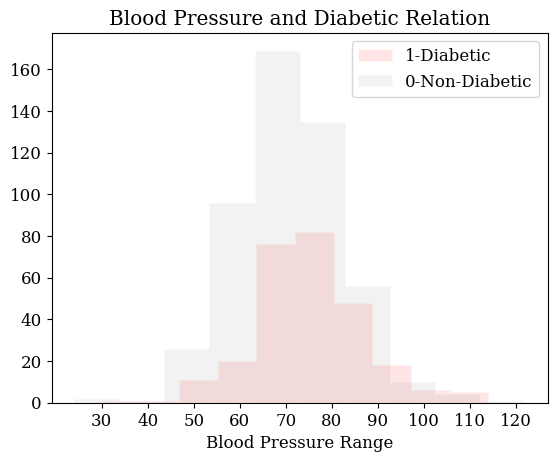

In [208]:
# BloodPressure and Diabetic Relation

#diab_df['BloodPressure'].max() # 122
# diabetic = diab_df.loc[diab_df['Outcome'] == 1]
# non_diabetic = diab_df.loc[diab_df['Outcome'] == 0]
#bins=[0, 15, 30, 45, 60, 75, 90, 105, 120],

# plt.figure(figsize=(6,4)) 
plt.hist(diabetic['BloodPressure'], bins=10, alpha=0.10, edgecolor="white", color='red')
plt.hist(non_diabetic['BloodPressure'], bins=10, alpha=0.10, edgecolor="white", color='grey')

plt.xticks(np.arange(30, 130, 10))
plt.title("Blood Pressure and Diabetic Relation")
plt.xlabel("Blood Pressure Range")
  
plt.legend(['1-Diabetic', '0-Non-Diabetic'])
plt.show()

In [209]:
# Avg diabetic BloodPressure level
diabetic['BloodPressure'].mean()

74.95032649253731

In [210]:
# Avg non-diabetic BloodPressure level
non_diabetic['BloodPressure'].mean()

70.8100078125

In [211]:
diab_df['SkinThickness'].min()

0

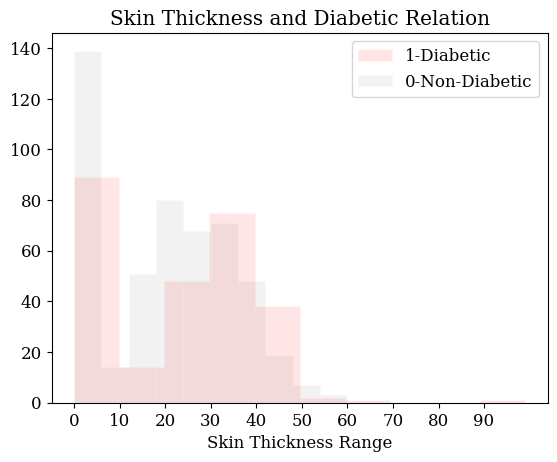

In [212]:
# SkinThickness and Diabetic Relation

#diab_df SkinThickness range 0-99

# plt.figure(figsize=(6,4)) 
plt.hist(diabetic['SkinThickness'], bins=10, alpha=0.10, edgecolor="white", color='red')
plt.hist(non_diabetic['SkinThickness'], bins=10, alpha=0.10, edgecolor="white", color='grey')

plt.xticks(np.arange(0, 100, 10))
plt.title("Skin Thickness and Diabetic Relation")
plt.xlabel("Skin Thickness Range")
  
plt.legend(['1-Diabetic', '0-Non-Diabetic'])
plt.show()

In [213]:
diab_df['Insulin'].max()

846.0

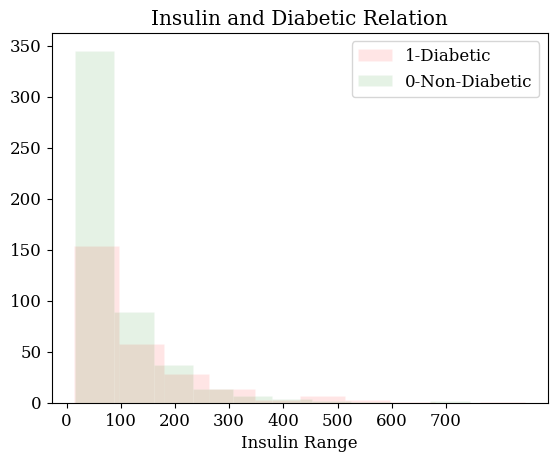

In [214]:
# Insulin and Diabetic Relation
#diab_df Insulin range 14-846

plt.hist(diabetic['Insulin'], bins=10, alpha=0.10, edgecolor="white", color='red')
plt.hist(non_diabetic['Insulin'], bins=10, alpha=0.10, edgecolor="white", color='green')

plt.xticks(np.arange(0, 701, 100))
plt.title("Insulin and Diabetic Relation")
plt.xlabel("Insulin Range")
  
plt.legend(['1-Diabetic', '0-Non-Diabetic'])
plt.show()

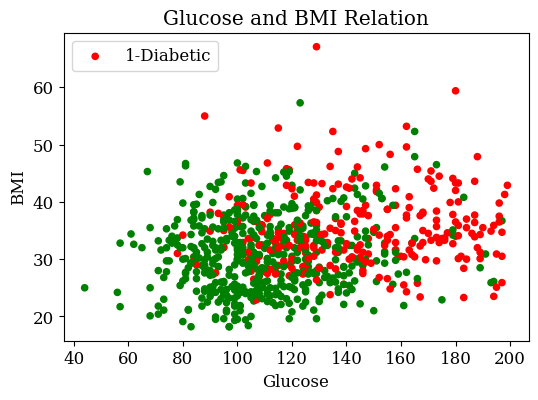

In [215]:
plt.figure(figsize=(6,4))

colors = ['green' if diagnosis == 0 else 'red' for diagnosis in diab_df["Outcome"]]
plt.scatter(diab_df["Glucose"], diab_df["BMI"], c=colors, s=20)

plt.title("Glucose and BMI Relation")
plt.xlabel("Glucose")
plt.ylabel("BMI")
plt.legend(['1-Diabetic', '0-Non-Diabetic'], loc ="upper left")

plt.show()

In [216]:
diabetic['Insulin'].mean()

141.4265974813433

In [217]:
non_diabetic['Insulin'].mean()

106.45735416666666

In [218]:
diab_df['BMI'].max()

67.1

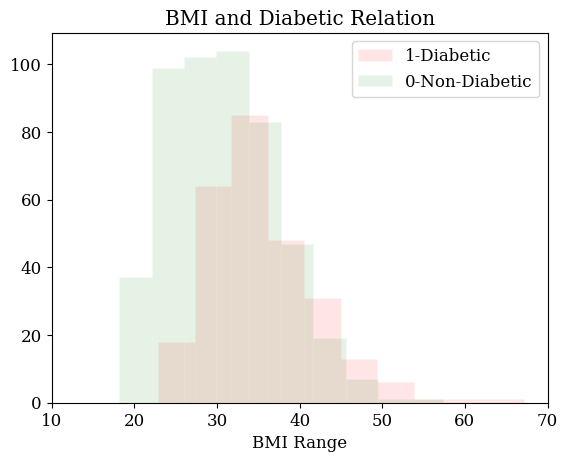

In [219]:
# BMI and Diabetic Relation

# range 18.2-67.1
# plt.figure(figsize=(6,4)) 

plt.hist(diabetic['BMI'], bins=10, alpha=0.10, edgecolor="white", color='red')
plt.hist(non_diabetic['BMI'], bins=10, alpha=0.10, edgecolor="white", color='green')

plt.xticks(np.arange(10, 71, 10))
plt.title("BMI and Diabetic Relation")
plt.xlabel("BMI Range")
  
plt.legend(['1-Diabetic', '0-Non-Diabetic'])
plt.show()

In [220]:
diab_df['Age'].min()

21

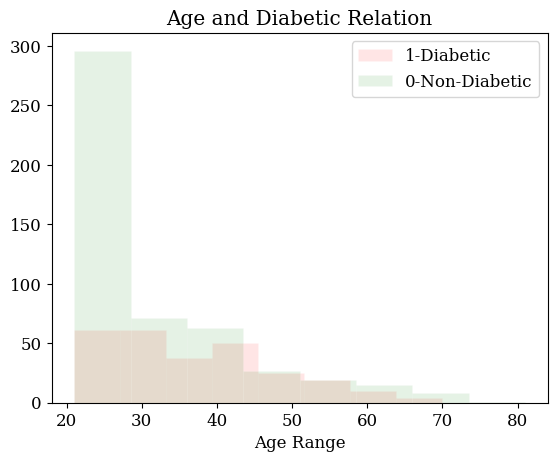

In [221]:
# Age and Diabetic Relation

# range 21-81
plt.hist(diabetic['Age'], bins=8, alpha=0.10, edgecolor="white", color='red')
plt.hist(non_diabetic['Age'], bins=8, alpha=0.10, edgecolor="white", color='green')

# plt.xticks(np.arange(0, 400, 50))
plt.title("Age and Diabetic Relation")
plt.xlabel("Age Range")
  
plt.legend(['1-Diabetic', '0-Non-Diabetic'])
plt.show()

In [222]:
diabetic['Age'].mean()

37.06716417910448

In [223]:
non_diabetic['Age'].mean()

31.19

In [224]:
from sklearn import svm 
from sklearn.model_selection import train_test_split

In [245]:
X = diab_df.iloc[:, :7]
y = diab_df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                   test_size=0.3, stratify=y,
                                   random_state=30)

In [246]:
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='linear', random_state=30).fit(X_train, y_train)

In [247]:
y_pred = svc.predict(X_test)

In [228]:
from sklearn import metrics

In [248]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7748917748917749
Precision: 0.7164179104477612
Recall: 0.5925925925925926


In [230]:
import seaborn as sns

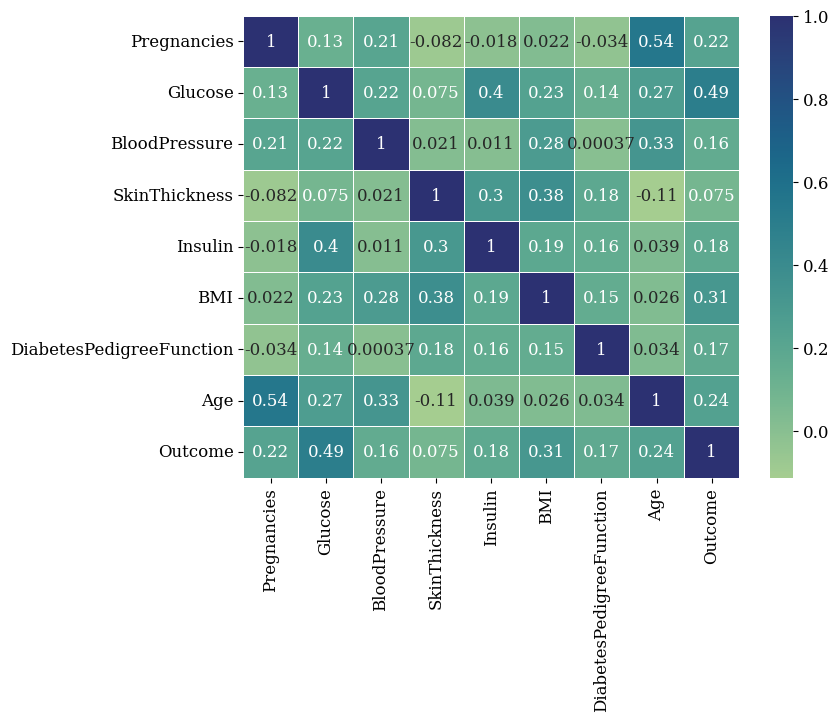

In [231]:
# For feature selection, what features are related to the outcome?
X = diab_df.iloc[:,0:7]  #columns
y = diab_df.iloc[:,-1]   #target column

#get correlations of each features in dataset
corrmat = diab_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(8,6))
#plot heat map
g=sns.heatmap(diab_df[top_corr_features].corr(), annot=True, cmap="crest", linewidth=.5)

In [232]:
diabetic.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,79.799479,33.6,0.627,50,1
2,8,183.0,64.0,0,79.799479,23.3,0.672,32,1
4,0,137.0,40.0,35,168.000000,43.1,2.288,33,1
6,3,78.0,50.0,32,88.000000,31.0,0.248,26,1
8,2,197.0,70.0,45,543.000000,30.5,0.158,53,1


In [233]:
from sklearn.ensemble import ExtraTreesClassifier

[0.12385507 0.27882717 0.11345633 0.08957837 0.08767948 0.170634
 0.13596959]


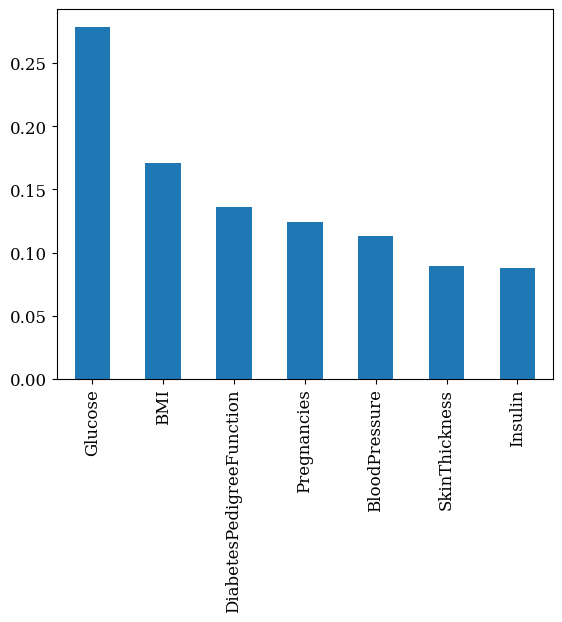

In [234]:
X = diab_df.iloc[:,0:7]  #columns
y = diab_df.iloc[:,-1]   #target column

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) 

#plot feature importances 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='bar')
plt.show()

In [235]:
#Outcome(Diabetic) correlation by rank - Glucose, BMI, Age, Pregnancies

In [242]:
# After feature selection
X = diab_df[['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Pregnancies', 'BloodPressure']]
y = diab_df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                   test_size=0.3, stratify=y)

In [243]:
svc = svm.SVC(kernel='linear').fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [244]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7575757575757576
Precision: 0.6923076923076923
Recall: 0.5555555555555556


In [78]:
w = svc.coef_[0]           # w consists of 7 elements - 7 features
b = svc.intercept_[0] 

In [79]:
w

array([ 0.11211199,  0.0289874 , -0.01335506,  0.00123717, -0.0009454 ,
        0.05454985,  0.4496482 ])

In [80]:
b

-5.699459600995267

In [77]:
plt.figure(figsize=(10, 8))

# Plotting our 7-features-space
sns.scatterplot(x=X_train, 
                y=X_train, 
                hue=y_train, 
                s=8);
# Constructing a hyperplane using a formula.
w = svc.coef_[0]           # w consists of 2 elements
b = svc.intercept_[0]      # b consists of 1 element
x_points = np.linspace(-1, 1)    # generating x-points from -1 to 1
y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points
# Plotting a red hyperplane
plt.plot(x_points, y_points, c='r');

ValueError: ignored

<Figure size 1000x800 with 0 Axes>